In [1]:
from graph import compile_reply_agent

In [2]:
reply_agent = compile_reply_agent()


Compiling workflow...


In [3]:
previous_response = """From: john.doe@company.com
To: debajyoti.majee@email.com
Subject: Project Update Request
Body: Hi Debajyoti, could you please provide an update on the status of the AtomMail feature development? We're planning the next sprint and need to know the current progress.

From: debajyoti.majee@email.com
To: john.doe@company.com
Subject: Re: Project Update Request
Body: Hi John, we've completed the backend integration and are currently working on the UI improvements. We're targeting to finish testing by next Friday.
"""

email_input = {
  "From": "john.doe@company.com",
  "To": "debajyoti.majee@email.com",
  "Subject": "Follow-up on UI Feedback",
  "Body": "Thanks for the update, Debajyoti. Can you also include the user feedback summary in your next report?"
}
query = """Reply thanking them and confirm that I'll include the feedback summary in the next update.
"""

In [4]:
response = reply_agent.invoke({
    "email":email_input,
    "previous_response":previous_response,
    "query":query
})

In [5]:
print(response)

{'email': {'From': 'john.doe@company.com', 'To': 'debajyoti.majee@email.com', 'Subject': 'Follow-up on UI Feedback', 'Body': 'Thanks for the update, Debajyoti. Can you also include the user feedback summary in your next report?'}, 'query': "Reply thanking them and confirm that I'll include the feedback summary in the next update.\n", 'previous_response': "From: john.doe@company.com\nTo: debajyoti.majee@email.com\nSubject: Project Update Request\nBody: Hi Debajyoti, could you please provide an update on the status of the AtomMail feature development? We're planning the next sprint and need to know the current progress.\n\nFrom: debajyoti.majee@email.com\nTo: john.doe@company.com\nSubject: Re: Project Update Request\nBody: Hi John, we've completed the backend integration and are currently working on the UI improvements. We're targeting to finish testing by next Friday.\n", 'generate_email': {'From': 'debajyoti.majee@email.com', 'To': 'john.doe@company.com', 'Subject': 'Re: Follow-up on U

In [6]:
response.keys()

dict_keys(['email', 'query', 'previous_response', 'generate_email'])

In [8]:
result = response["generate_email"]


In [9]:
print("From:",result["From"])
print("To:",result["To"])
print("Subject:",result["Subject"])
print("Body:",result["Body"])

From: debajyoti.majee@email.com
To: john.doe@company.com
Subject: Re: Follow-up on UI Feedback
Body: Hi John,

Thank you for the feedback. I will include the user feedback summary in the next update.

Regards,
Debajyoti


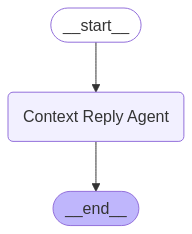

In [11]:
from IPython.display import display,Image

display(Image(reply_agent.get_graph(xray=True).draw_mermaid_png()))